## Creating the Data Base

In [9]:
import sqlite3

# connection to the database (or create it if it doesn't exist)
conn = sqlite3.connect('sales_data.db')
# cursor is used to execute SQL commands (e.g., creating tables, inserting data) and fetch query results
# cursor is pointer that navigates the database.
cursor = conn.cursor()

cursor.execute('''
      CREATE TABLE IF NOT EXISTS sales(
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        product TEXT NOT NULL,
        quantity INTEGER NOT NULL,
        price INTEGER NOT NULL
      )
''')

# Sample data
sample_data = [
    ('Product A', 5, 10.0),
    ('Product B', 15, 200.0),
    ('Product A', 2, 5.0),
    ('Product C', 25, 510.0),
    ('Product B', 25, 40.0),
  ]
cursor.executemany('INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)',sample_data)

# commit the changes to the database permanently
conn.commit()
conn.close()

print("Database and sales table created successfully!")

Database and sales table created successfully!


In [22]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('sales_data.db')

# Sql query to get total quantity & revenue by product
query = '''
    SELECT product,
      SUM(quantity) AS total_quantity,
      SUM(quantity * price) AS revenue
    FROM sales
    GROUP BY product
'''

# load the query results into a pandas dataframe
df = pd.read_sql_query(query, conn)

conn.close()

print("Sales Summary:")
display(df)

Sales Summary:


,product,total_quantity,revenue
0,Product A,7,60
1,Product B,40,4000
2,Product C,25,12750


<Figure size 800x600 with 0 Axes>

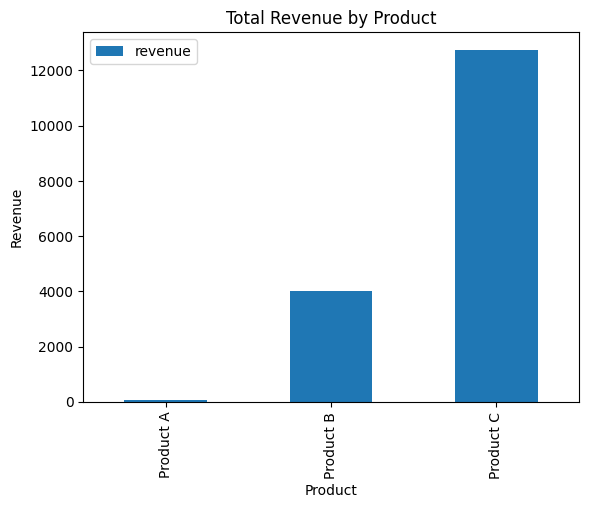

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
# creating a bar chart
df.plot(kind='bar', x='product', y='revenue')
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.title("Total Revenue by Product")

# saving the image
plt.savefig("sales_chart.png")